0. Download and install modules from : https://github.com/SpikeInterface

In [1]:
import matplotlib
%autosave 180
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.gridspec as gridspec

%matplotlib tk

import matplotlib.cm as cm
from matplotlib import gridspec

import numpy as np
import os

import h5py


Autosaving every 180 seconds


In [2]:
import spikeextractors as se
import spikesorters as ss
import spikecomparison as sc
import spikewidgets as sw
import spikeinterface.toolkit as st

import numpy as np
import matplotlib.pylab as plt
import scipy.signal

In [3]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [29]:
# load data
f = h5py.File('/media/cat/4TBSSD/felix/mea_20190502_141044.raw.h5', 'r')

list(f.keys())


['bits',
 'chipinformation',
 'ephys',
 'hardware_settings',
 'spikesorting',
 'time']

In [30]:
traces = f['ephys']['signal']
print ("traces: ", traces.shape)
frate = f['ephys']['frame_rate']

traces:  (1024, 3135800)


In [31]:
mapping = f['ephys']['mapping']

x = mapping['x']
y = mapping['y']
print (x.shape)

geom = np.vstack((x,y)).T
print (geom.shape)
np.savetxt('/media/cat/4TBSSD/felix/geom.txt', geom)

electrode = f['ephys']['mapping']['electrode']
print ("electrode: ", electrode[:10])

channel_ids = mapping['channel']
print ("ChanneL: ", channel_ids[:10])
np.savetxt('/media/cat/4TBSSD/felix/channel.txt', channel_ids)


(934,)
(934, 2)
electrode:  [ 7779 11971 11762 12409 13499  7987  5569  6452  7332  4458]
ChanneL:  [1016  227  219  215  538  542  796  437  441  576]


In [11]:
# grab the nonmissing data in the order of the channels
recordings = traces[np.sort(channel_ids)]
print ("recordings: ", recordings.shape)




recordings:  (934, 3135800)


In [12]:
sorted_idx = np.argsort(channel_ids)
    
data = recordings[sorted_idx].T
print (data.shape)

(3135800, 934)


In [25]:
print (frate.value)


np.array(data)[channel].tofile("/media/cat/4TBSSD/felix/data.bin")

/home/cat/.conda/envs/sf/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


[20000.]


In [19]:
data_read = np.fromfile('/media/cat/4TBSSD/felix/data.bin','int16')


In [20]:
data_2D = data_read.reshape(934,-1).T
print (data_2D.shape)

data_2D.tofile('/media/cat/4TBSSD/felix/data_int16.bin')

(3135800, 934)


Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/cat/.conda/envs/sf/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/home/cat/.conda/envs/sf/lib/python3.7/tkinter/__init__.py", line 749, in callit
    func(*args)
  File "/home/cat/.conda/envs/sf/lib/python3.7/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/home/cat/.conda/envs/sf/lib/python3.7/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/cat/.conda/envs/sf/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/home/cat/.conda/envs/sf/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object 

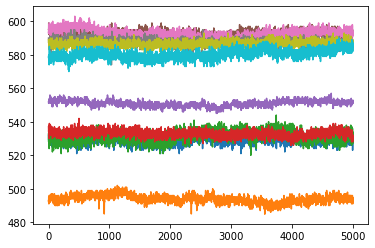

In [24]:
for k in range(10):
    plt.plot(data_2D[:5000,k]+k*10)
plt.show()

In [17]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 20000.0
lowcut = 300.0
highcut = 6000.0

from scipy.signal import freqz
    
for k in range(data.shape[0]):
    filtered = butter_bandpass_filter(data[k,10000:15000],lowcut,highcut,fs)  
    plt.plot(filtered+k*10,c='black')
plt.show()

In [5]:
import sys, os
sys.path.append(os.getcwd() + '/../spikeextractors')
sys.path.append(os.getcwd() + '/../spikesorters')
sys.path.append(os.getcwd() + '/../spikecomparison')
sys.path.append(os.getcwd() + '/../spikewidgets')
sys.path.append(os.getcwd() + '/../spikeinterface')

1. Import modules

2. Load a test file:

In [8]:
test_file_name = '/media/cat/4TBSSD/felix/mea_20190502_141044.raw.h5'
    
recording = se.Mea1kRecordingExtractor(test_file_name) #(or MaxOneRecordingExtractor)

Chip version: 20170126


In [10]:
recording_bp = st.preprocessing.bandpass_filter(recording, freq_min=300, freq_max=6000)
recording_car = st.preprocessing.common_reference(recording, reference='average')

Plot some raw data:

In [9]:
sw.plot_timeseries(recording, trange=[1,2], channel_ids=[0,1,2,3])
plt.show()

In [ ]:
print (recording.get_traces())



In [ ]:
traces = recording_bp.get_traces().shape

Alternatively, to see how raw traces are accessed:

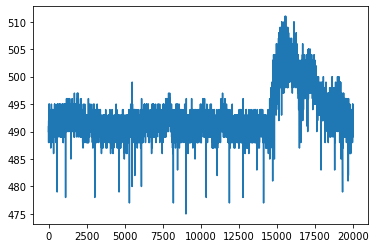

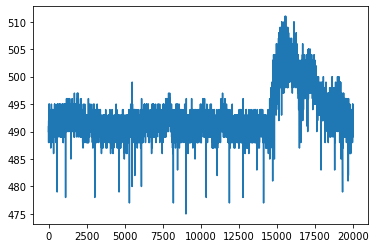

In [11]:
%matplotlib inline
fig1, ax1 = plt.subplots()
ax1.plot(recording.get_traces(channel_ids=0, start_frame=20000, end_frame=40000)[0])

fig2, ax2 = plt.subplots()
ax2.plot(recording.get_traces(channel_ids=0, start_frame=20000, end_frame=40000)[0])

Plot the electrode configuration:

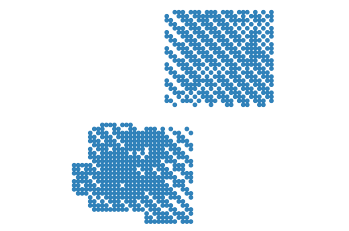

In [12]:
sw.plot_electrode_geometry(recording)

In [13]:
recording.get_channel_locations()

array([[1382.5,  612.5],
       [1592.5,  945. ],
       [1785. ,  927.5],
       ...,
       [1540. ,  997.5],
       [1050. ,  595. ],
       [1067.5,  647.5]])

3. Start HDsort (same as Mysort) spike-sorter.
This requires the spike-sorter to be set up correctly in the background. HDsort is written in Matlab.

In [30]:
params = ss.get_default_params('hdsort')
print(params)

{'detect_threshold': 4.2, 'detect_sign': -1, 'filter': True, 'parfor': True, 'hpf': 300, 'lpf': 7000, 'n_pc_dims': 6, 'chunk_size': 500000, 'loop_mode': 'local_parfor'}


In [7]:
sort_hd = ss.run_hdsort(recording, **params)

Using Mea1k format
RUNNING SHELL SCRIPT: /var/folders/lk/jnqk24c91y71djhsqpyp39z4003ztn/T/tmp_shellscript89wx569d/script.sh


In [9]:
print(sort_hd)

In [21]:
unit_id = sort_hd.get_unit_ids()
st = sort_hd.get_unit_spike_train(unit_id[0])

In [61]:
temps = np.load('/media/cat/4TBSSD/felix/tmp/output/templates_0sec.npy')

print (temps.shape)

(611, 61, 934)


In [6]:
for k in range(100):
    ax=plt.subplot(10,10,k+1)
    plt.plot(temps[k])
    plt.xticks([])
plt.show()

In [21]:
spike_train = np.load('/media/cat/4TBSSD/felix/tmp/output/spike_train.npy')
print (spike_train.shape)
print (spike_train)

(9899117, 2)
[[       0      609]
 [       0      519]
 [       0       40]
 ...
 [87569662      584]
 [87569663      216]
 [87569665      525]]


In [8]:
fnames = ['/media/cat/4TBSSD/felix/tmp/output/drive-download-20201016T081418Z-001/mea_20190502_140013.raw_frame_numbers.npy',
'/media/cat/4TBSSD/felix/tmp/output/drive-download-20201016T081418Z-001/mea_20190502_140614.raw_frame_numbers.npy',
'/media/cat/4TBSSD/felix/tmp/output/drive-download-20201016T081418Z-001/mea_20190502_141044.raw_frame_numbers.npy',
'/media/cat/4TBSSD/felix/tmp/output/drive-download-20201016T081418Z-001/mea_20190502_141546.raw_frame_numbers.npy',
'/media/cat/4TBSSD/felix/tmp/output/drive-download-20201016T081418Z-001/mea_20190502_143106.raw_frame_numbers.npy',
'/media/cat/4TBSSD/felix/tmp/output/drive-download-20201016T081418Z-001/mea_20190502_144649.raw_frame_numbers.npy',
'/media/cat/4TBSSD/felix/tmp/output/drive-download-20201016T081418Z-001/mea_20190502_145006.raw_frame_numbers.npy',
'/media/cat/4TBSSD/felix/tmp/output/drive-download-20201016T081418Z-001/mea_20190502_150529.raw_frame_numbers.npy']


In [24]:
# make real-time spiketimes
final_frames = []
frame0 = np.load(fnames[0])[0]
print (frame0)
for fname in fnames:
    frames = np.load(fname)
    final_frames.append(frames-frame0)

final_frames.append(np.zeros(100,'int32')+87569665)
final_frames = np.hstack(final_frames)

# append a few values at end, they are missed by real-time frame #s for some reason

print (final_frames.shape)



254158500
(87569700,)


In [66]:
# MAKE FINAL SPIKE TRAIN
spike_train_realtime = spike_train.copy()
spike_train_realtime[:,0] = final_frames[spike_train[:,0]]
print (spike_train_realtime)
np.save('/media/cat/4TBSSD/felix/tmp/output/spike_train_realtime.npy', spike_train_realtime)

[[       0      609]
 [       0      519]
 [       0       40]
 ...
 [87569665      584]
 [87569665      216]
 [87569665      525]]


In [65]:
# plot rasters:
window = 60 * 30000
img = np.zeros((temps.shape[0],100569665//20//10))
print (img.shape)
fig=plt.figure()
ax=plt.subplot(111)
for k in range(temps.shape[0]):
    idx = np.where(spike_train_realtime[:,1]==k)[0]
    times = spike_train_realtime[idx,0]
    #print ("times: ", times.shape, times[:10],times[-10:])
    times_binned = times//20//10
    #print ("times bineed: ", times_binned[:10],times_binned[-10:])
    img[k,times_binned]=1
    #plt.scatter(times, times*0+k, c='black')
plt.imshow(img,aspect='auto',cmap='Greys',interpolation='none')
plt.xticks(np.arange(0,502848,50000), np.arange(0,502848,50000)//100//60)
plt.ylabel("Neuron ID", fontsize=40)
plt.xlabel("Time (min)",fontsize=40)
ax.tick_params('both',labelsize=40)
plt.suptitle('Experiment: mea_20190502',fontsize=40)
plt.show()


(611, 502848)


In [23]:
geom = np.loadtxt('/home/cat/Downloads/geom.txt')
print (geom.shape)
templates = np.load('/home/cat/Downloads/templates_0sec.npy')
print (templates.shape)

(934, 2)
(611, 61, 934)


In [26]:
mapping = f['ephys']['mapping']
print (mapping['x'].shape)
x = mapping['x']
y = mapping['y']
channel = mapping['channel']
print (channel.shape)
print (x.shape)

geom = np.vstack((x,y)).T
print (geom.shape)
print (geom)

NameError: name 'f' is not defined

In [18]:
recording.get_channel_locations()

array([[1382.5,  612.5],
       [1592.5,  945. ],
       [1785. ,  927.5],
       ...,
       [1540. ,  997.5],
       [1050. ,  595. ],
       [1067.5,  647.5]])

In [90]:
geom = np.loadtxt('/home/cat/Downloads/geom(2).txt')
templates = np.load('/home/cat/Downloads/templates.npy')
templates = np.load('/home/cat/Downloads/cluster_result_432/templates.npy')
print (templates.shape)



(8, 61, 934)


In [113]:
from scipy.signal import freqz

data_int16 = np.fromfile('/media/cat/4TBSSD/felix/data_int16.bin','int16',20000*934*1)
#data_int16 = np.fromfile('/media/cat/4TBSSD/felix/data.bin','uint16',20000*934*1)
#data_int16 = np.fromfile('/home/cat/Downloads/mea_20190502_140013.raw.all.redone.2sec.bin','int16')
#data_int16 = np.fromfile('/home/cat/Downloads/mea_20190502_140013.raw.all.2sec.bin','int16')
data2d = np.int16(data_int16).reshape(-1,934)
print (data2d.shape)
    
lowcut=300
highcut=5000
fs = 20000
for k in range(data2d.shape[1]):
    filtered = butter_bandpass_filter(data2d[:,k],lowcut,highcut,fs)  
    data2d[:,k] = filtered

(20000, 934)


In [123]:
templates_old = np.load('/media/cat/4TBSSD/felix/tmp/nn_train/augment/templates/templates.npy')
print (templates_old.shape)

(816, 161, 934)


In [127]:
ptps = templates_old.ptp(1).max(1)
idx = np.where(ptps>16.0)[0]
templates=templates_old[idx]
print ("larger templates; ", templates.shape)
unit = 10


#for k in range(geom.shape[0]):
#print (channel_ids)
idx = np.argsort(channel_ids)
width = 200
offset = 6000-50
yscale = 1

width = templates.shape[1]

for k in np.arange(templates.shape[2]):    
    plt.plot(geom[k,0]+np.arange(width)/(width/5), 
             templates[unit,:,k]/yscale+geom[k,1],c='black')
             #data2d[offset:offset+width,k]/yscale+geom[k,1],c='black')
plt.show()

larger templates;  (14, 161, 934)


In [7]:
from pathlib import Path

path = Path('/media/cat/4TBSSD/felix')

rec_paths = sorted([p for p in path.iterdir() if p.suffix == '.h5'])

recompute = True
recordings = []
for i, rec in enumerate(rec_paths):
    recording = se.Mea1kRecordingExtractor(rec)
    if i == 0:
        channel_order = recording.get_channel_ids()
        recording_sorted = recording
    else:
        recording_sorted = se.SubRecordingExtractor(recording, channel_ids=channel_order)
    recordings.append(recording_sorted)

multirec = se.MultiRecordingTimeExtractor(recordings)

multirec.write_to_binary_dat_format('/home/cat/recording.dat')

Chip version: 20170126


In [ ]:
def get_traces(self, channel_ids=None, start_frame=None, end_frame=None):
    if np.array(channel_ids).size > 1:
        if np.any(np.diff(channel_ids) < 0):
            sorted_idx = np.argsort(channel_ids)
            recordings = self._signals[np.sort(channel_ids), start_frame:end_frame]
            return recordings[sorted_idx].astype('float')
        else:
            return (self._signals[np.array(channel_ids), start_frame:end_frame] * self._lsb).astype('float32')
    else:
        return (self._signals[np.array(channel_ids), start_frame:end_frame] * self._lsb).astype('float32')

